#EASYMONEY

In [733]:
from IPython.display import Image
Image(url='https://lh3.googleusercontent.com/LzCgpXQ_vD9O717mlEV9wzRhhfXVqn8OYnd2guu3wz8bwrlt3B6C7rTk4gwvIO12yJccnayagm8qbiNQlbViixL4n1deIwPTIj79LdgnkDG7RQEfAEY97REmTyVAQZVrCpFr_Wqvh8fmCglKry-Cglj3kDYNIZCHill7ela-X9hYWUvQy4XKJ0vN3LGsgfoJNVqnsd9l9aTIxn6w2I-22k0OEXnAWmrG6zifbUhy4cn097Ub-AqTS_qIivePD3V-SdBKWjNzRT7GcXIWZe3_4dtiIJhbCx_curxwwGfMDNYkuK4BhXmjCzLEeyDpfZHJEoMdUNOp_EyPPPpl2TnHnuGABzyDd0sonYmmhywApURtdQLcyEehzOIg64YxotQg7JBSykfXLbEEYtBaAWz_VpaDF7g73hbJEGxx51Kk5pZZNLvSS8wE9BehEIxv_UQ1ohIzkdY1gNb6-5RoWGvLkOe0KYjTmGopQ7J_1HJCQuqLjZq6UTIkv2pdmCrtuiwef5xAu8JYOQnU6TQCytuMBO9tD3MbpRLCCxGpJNiYEIQ9YNsb7ooRhRrhOR4aneAcTsCeDBGYSz5E9lgw0lHMVi0vHVF79RXorsW0YC5Ed91J1Bd5sHB78gkX4gwBuKa-fUOfHvevPyXu8BPM0etS4ziaxNDaCJSp48Lohpo5XDBfabRF0Tt81CTrtKbGVJGAulSmo-UmWpJI2HthBpL3GR_yhdG6pJ2uVfTuPMjOqU9zPiWpL7YAoKWdRdeqdca7ZFtcZU6ri_cYgIP6bOadYiEXm5daUXjlr5iRE11z-bD1vZMi-J6Qm-r9SPVXHIgIy8CRuNIJBC5UBTvj5aXrHdWtqHOb0uhftq5GtrpKMsVAVIU0w1HES-YHrW7mjrbMDbFUpSo1hWQAYwV44Cb5BKghaRQEj9Tp6nq9jhYbKfE=w566-h262-no?authuser=0')  

#IMPORTAMOS LIBRERIAS

In [734]:
import pandas as pd 
import numpy as np

In [735]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans

In [736]:
import time

In [737]:
import matplotlib.pyplot as plt
import seaborn as sns

In [738]:
from pandas.core.groupby import groupby

#FUNCIONES Y CLASES

In [739]:
 np.random.seed(42)

In [740]:
class ArrayToDataFrame(BaseEstimator, TransformerMixin):
    '''
    Clase que transforma un array en un DataFrame.
    Necesita como parámetros el nombre de las columnas y el índice.
    '''
    
    def __init__(self, columns, index = None):
        self.columns = columns
        self.index = index
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        
        if self.index != None:
            df = pd.DataFrame(X, columns = self.columns, index = self.index)
            
        else:
            df = pd.DataFrame(X, columns = self.columns)
            
        return df

In [741]:
class OutlierFilter(BaseEstimator, TransformerMixin):
    '''
    Clase que filtra los outliers utilizando np.quantile()
    Los cuantiles a filtrar así como las columnas a filtrar son los parámetros de la clase.
    '''
    
    def __init__(self, q, col_to_filter):
        self.q = q
        self.col_to_filter = col_to_filter
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        '''
        El método considera outlier a aquel cliente que es outlier en todas las columnas que le pasas.
        Es decir: si tiene que filtrar importe y número de pedidos, sólo va a eliminar aquellos clientes
        que son outlier tanto en importe como número de pedidos. Si eres outlier en importe pero no en pedido
        no se te va a filtrar del dataset.
        '''
        
        # lista vacía
        criteria_list = []
        
        # agregamos a la lista los clientes que son outliers
        for col in self.col_to_filter:
            criteria = X[col] < np.quantile(X[col], q = self.q)
            criteria_list.append(criteria)
            
        # si hay más de 1 columna
        if len(self.col_to_filter) > 1:
            
            # creamos el criterio global: es decir outlier en todas las columnas
            global_criteria = criteria_list[0]
            
            for criteria in criteria_list[1:]:
                global_criteria = global_criteria & criteria
                
        else:
            global_criteria = criteria_list[0]
            
        # filtramos nuestra dataframe
        X = X[global_criteria]
        
        # guardamos el índice como parámetro de la clase porque en caso contrario lo perderíamos.
        self.index = X.index
        
        return X

#IMPORTAMOS DATOS


In [742]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [743]:
CLUST = pd.read_csv("/content/drive/MyDrive/datasets/CLUST.csv")

In [744]:
CLUST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442909 entries, 0 to 442908
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 442909 non-null  int64  
 1   ID_USR                     442909 non-null  int64  
 2   SEXO                       442909 non-null  int64  
 3   EDAD                       442909 non-null  int64  
 4   SALARIO                    442909 non-null  float64
 5   SEGMENTO                   442909 non-null  object 
 6   DE_ESPAÑA                  442909 non-null  int64  
 7   COM.AUTONOMA_ESP           442909 non-null  object 
 8   CANAL_ENTRADA              442909 non-null  object 
 9   ACTIVO/A                   442909 non-null  int64  
 10  ANTIGUEDAD_DIAS            442909 non-null  int64  
 11  ANTIGUEDAD_MESES           442909 non-null  int64  
 12  PROD_DEPOSITO_CP           442909 non-null  int64  
 13  PROD_PRESTAMOS             44

In [745]:
CLUST.columns

Index(['Unnamed: 0', 'ID_USR', 'SEXO', 'EDAD', 'SALARIO', 'SEGMENTO',
       'DE_ESPAÑA', 'COM.AUTONOMA_ESP', 'CANAL_ENTRADA', 'ACTIVO/A',
       'ANTIGUEDAD_DIAS', 'ANTIGUEDAD_MESES', 'PROD_DEPOSITO_CP',
       'PROD_PRESTAMOS', 'PROD_HIPOTECA', 'PROD_FONDOS', 'PROD_VALORES',
       'PROD_DEPOSITOS_LP', 'PROD_CUENTA_EM++', 'PROD_TARJETA_CREDITO',
       'PROD_DOMICILIACIONES', 'PROD_PLAN_PENSIONES',
       'PROD_CUENTA_BON_DOMICILIA', 'PROD_CUENTA_EM_CRYPTO',
       'PROD_TARJETA_DEBITO', 'PROD_CUENTA_EM+', 'PROD_CUENTA_EM',
       'TOTAL_PROD', 'VAR_PROD', 'STATUS_CLIENTE', 'SEGMENTO_ID', 'STATUS_ID',
       'CANAL_ENT_ID', 'CCAA_ID', 'RANGO_SALARIAL_ID'],
      dtype='object')

In [746]:
CLUST.drop('Unnamed: 0', axis=1, inplace = True)

#CLUSTERIZACION

In [747]:
#Creación dataset con columnas a elegir
CLUST_FINAL=CLUST.copy()

Podemos iterar desde este punto hasta el gráfico del hombro activando y desactivando columnas mediante # hasta encontrar la combinación con un resultado que nos resulte más satisfactorio.

In [748]:
CLUST_FINAL.set_index("ID_USR", inplace = True)

lc = [
      'SEXO',
      'EDAD',
   #   'SALARIO',
   #  'DE_ESPAÑA',
 #    'COM.AUTONOMA_ESP', 
  #   'CANAL_ENTRADA', 
      'ACTIVO/A',
 #    'ANTIGUEDAD_DIAS', 
      'ANTIGUEDAD_MESES', 
  #    'PROD_DEPOSITO_CP',
  #    'PROD_PRESTAMOS', 
#      'PROD_HIPOTECA', 
 #     'PROD_FONDOS', 
  ##    'PROD_VALORES',
    #  'PROD_DEPOSITOS_LP', 
  #    'PROD_CUENTA_EM++', 
   #   'PROD_TARJETA_CREDITO',
    #  'PROD_DOMICILIACIONES', 
     # 'PROD_PLAN_PENSIONES',
#      'PROD_CUENTA_BON_DOMICILIA', 
 #     'PROD_CUENTA_EM_CRYPTO',
  #    'PROD_TARJETA_DEBITO', 
   #   'PROD_CUENTA_EM+', 
    #  'PROD_CUENTA_EM',
      'TOTAL_PROD', 
 #     'VAR_PROD', 
 #    'STATUS_CLIENTE', 
##      'SEGMENTO_ID', 
      'STATUS_ID',
 ##     'CANAL_ENT_ID', 
 ##     'CCAA_ID', 
 #    'RANGO_SALARIAL_ID'
]

CLUST_FINAL = CLUST_FINAL[lc]

In [749]:
corr=CLUST_FINAL.corr()

In [750]:
corr.style.background_gradient(cmap='coolwarm')

,SEXO,EDAD,ACTIVO/A,ANTIGUEDAD_MESES,TOTAL_PROD,STATUS_ID
SEXO,1.000000,-0.087610,-0.055491,0.016100,-0.033332,-0.007840
EDAD,-0.087610,1.000000,0.245489,0.012880,0.188506,-0.002216
ACTIVO/A,-0.055491,0.245489,1.000000,-0.081459,0.529173,-0.435802
ANTIGUEDAD_MESES,0.016100,0.012880,-0.081459,1.000000,0.081068,-0.095392
TOTAL_PROD,-0.033332,0.188506,0.529173,0.081068,1.000000,-0.679800
STATUS_ID,-0.007840,-0.002216,-0.435802,-0.095392,-0.679800,1.000000


In [751]:
columns = list(CLUST_FINAL.columns)
index = list(CLUST_FINAL.index)

#NORMALIZACIÓN Y ELBOW CURVE

In [752]:
pipe = Pipeline(steps = [
    ("ArrayToDataFrame", ArrayToDataFrame(columns, index = index)),
    ("OutlierFilter", OutlierFilter(q = 0.99, col_to_filter = [
        #"SALARIO", 
        "EDAD"])),
    ("MinMaxScaler", MinMaxScaler()),
])

In [753]:
CLUST_TRAIN=pipe.fit_transform(CLUST_FINAL)

In [754]:
CALCULATE_ELBOW = True

In [755]:
if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(3, 10):

        print(f"Fitting pipe with {k} clusters")

        clustering_model = KMeans(n_clusters = k,random_state=42)

        clustering_model.fit(CLUST_TRAIN)

        sse[k] = clustering_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

Fitting pipe with 3 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 4 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 5 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 6 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 7 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 8 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 9 clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Elbow curve took 0 minutes.


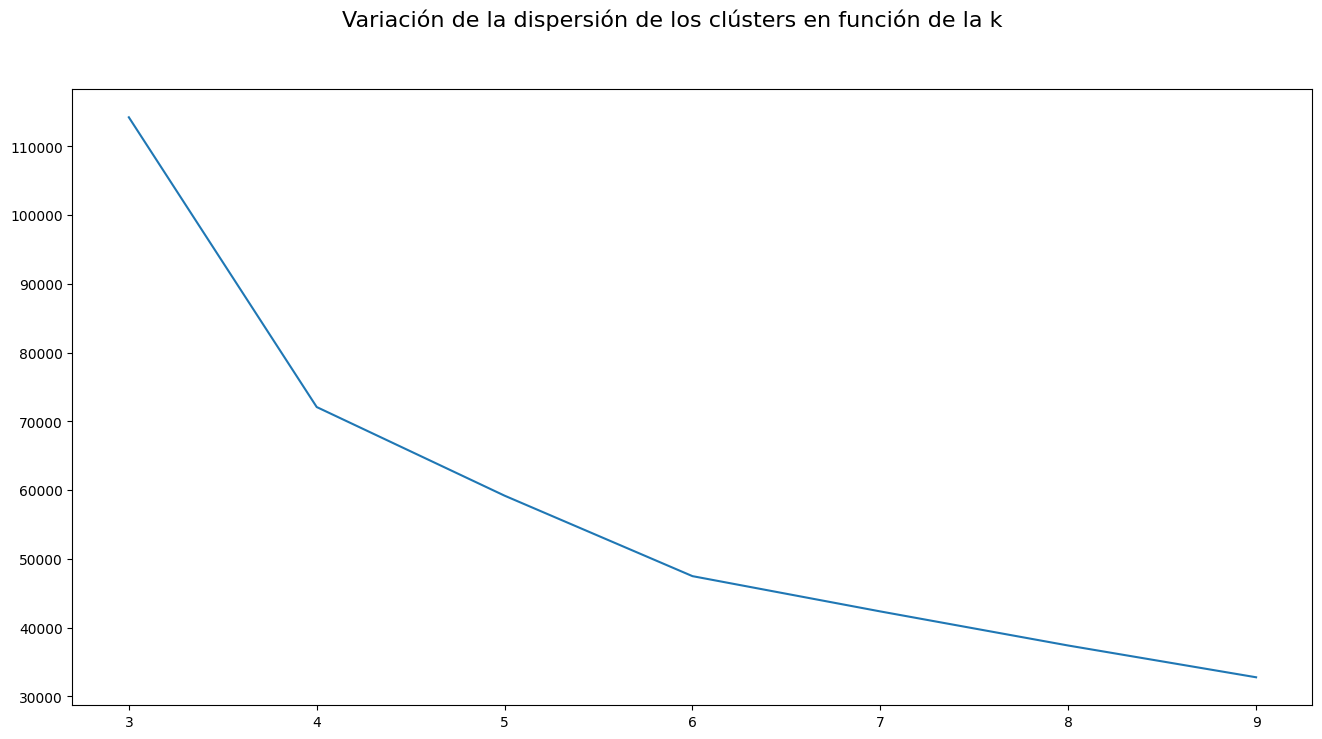

In [756]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [757]:
#Iterar desde la selección de columnas hasta aquí para encontrar la configuración del kmeans

In [758]:

pipe2 = Pipeline(steps = [
    ("ArrayToDataFrame", ArrayToDataFrame(columns, index = index)),
    ("OutlierFilter", OutlierFilter(q = 0.99, col_to_filter = [
       # "SALARIO", 
        "EDAD"])),
    ("MinMaxScaler", MinMaxScaler()),
    ("Clustering", KMeans(n_clusters = 6,random_state=42))
])

In [759]:
pipe2.fit(CLUST_FINAL)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('ArrayToDataFrame',
                 ArrayToDataFrame(columns=['SEXO', 'EDAD', 'ACTIVO/A',
                                           'ANTIGUEDAD_MESES', 'TOTAL_PROD',
                                           'STATUS_ID'],
                                  index=[657826, 657817, 657986, 657905, 657336,
                                         657147, 658184, 658576, 655774, 655419,
                                         655682, 656163, 656942, 656915, 656215,
                                         656613, 656415, 661519, 661894, 661308,
                                         662428, 662794, 662772, 662366, 659551,
                                         659822, 659223, 659236, 659080, 660568, ...])),
                ('OutlierFilter',
                 OutlierFilter(col_to_filter=['EDAD'], q=0.99)),
                ('MinMaxScaler', MinMaxScaler()),
                ('Clustering', KMeans(n_clusters=6, random_state=42))])

In [760]:
X_processed = pipe2["ArrayToDataFrame"].transform(CLUST_FINAL)
CLUST_scaled = pipe2["MinMaxScaler"].transform(X_processed)

In [761]:
etiquetas = pipe2["Clustering"].predict(CLUST_scaled)

In [762]:
CLUST_FINAL['CLUSTER']=etiquetas

In [763]:
CLUST_FINAL

,SEXO,EDAD,ACTIVO/A,ANTIGUEDAD_MESES,TOTAL_PROD,STATUS_ID,CLUSTER
ID_USR,,,,,,,
657826,2,44,1,48,1,2,0
657817,1,32,0,0,0,5,5
657986,2,39,1,39,6,2,0
657905,2,85,1,27,2,2,0
657336,1,38,1,2,1,2,3
...,...,...,...,...,...,...,...
1166765,1,22,0,33,1,2,1
1166764,1,23,0,33,1,2,1
1166763,2,47,1,33,1,2,0


In [764]:
CLUST_FINAL['CLUSTER'].value_counts()

4    91945
3    89340
0    82174
1    72873
2    53535
5    53042
Name: CLUSTER, dtype: int64

#RECUPERACIÓN CATEGÓRICAS

In [765]:
CLUST_FINAL_CAT=CLUST.copy()

In [766]:
CLUST_FINAL_CAT.set_index("ID_USR", inplace = True)

lc = [
      'SEGMENTO', 
      'STATUS_CLIENTE',
      'CANAL_ENTRADA', 
      'COM.AUTONOMA_ESP', 
]

CLUST_FINAL_CAT = CLUST_FINAL_CAT[lc]

In [767]:
CLUST_FINAL_MERGED= CLUST_FINAL.merge(CLUST_FINAL_CAT, on='ID_USR', how='left')

In [768]:
columnas_id=[      
 #     'SEGMENTO_ID', 
      'STATUS_ID',
 #     'CANAL_ENT_ID', 
 #     'CCAA_ID', 
      ]
CLUST_FINAL_MERGED.drop(columnas_id, axis=1, inplace = True)

In [769]:
#CLUST_FINAL_MERGED['SEXO']=CLUST_FINAL_MERGED['SEXO'].astype(object)
#CLUST_FINAL_MERGED['DE_ESPAÑA']=CLUST_FINAL_MERGED['DE_ESPAÑA'].astype(object)
#CLUST_FINAL_MERGED['ACTIVO/A']=CLUST_FINAL_MERGED['ACTIVO/A'].astype(object)

In [770]:
CLUST_FINAL_MERGED['SEXO']=np.where(CLUST_FINAL_MERGED['SEXO']==1,'HOMBRE',CLUST_FINAL_MERGED['SEXO'])
CLUST_FINAL_MERGED['SEXO']=np.where(CLUST_FINAL_MERGED['SEXO']=='2','MUJER',CLUST_FINAL_MERGED['SEXO'])
CLUST_FINAL_MERGED['ACTIVO/A']=np.where(CLUST_FINAL_MERGED['ACTIVO/A']==1,'SI',CLUST_FINAL_MERGED['ACTIVO/A'])
CLUST_FINAL_MERGED['ACTIVO/A']=np.where(CLUST_FINAL_MERGED['ACTIVO/A']=='0','NO',CLUST_FINAL_MERGED['ACTIVO/A'])

In [771]:
CLUST_FINAL_MERGED

,SEXO,EDAD,ACTIVO/A,ANTIGUEDAD_MESES,TOTAL_PROD,CLUSTER,SEGMENTO,STATUS_CLIENTE,CANAL_ENTRADA,COM.AUTONOMA_ESP
ID_USR,,,,,,,,,,
657826,MUJER,44,SI,48,1,0,02 - PARTICULARES,CLIENTE FIDELIZADO,013,CATALUÑA
657817,HOMBRE,32,NO,0,0,5,04 - OTROS,CLIENTE POTENCIAL,DES,CATALUÑA
657986,MUJER,39,SI,39,6,0,02 - PARTICULARES,CLIENTE FIDELIZADO,KAF,ANDALUCIA
657905,MUJER,85,SI,27,2,0,01 - TOP,CLIENTE FIDELIZADO,KAT,MADRID
657336,HOMBRE,38,SI,2,1,3,02 - PARTICULARES,CLIENTE FIDELIZADO,KAT,MADRID
...,...,...,...,...,...,...,...,...,...,...
1166765,HOMBRE,22,NO,33,1,1,03 - UNIVERSITARIO,CLIENTE FIDELIZADO,KHE,ARAGON
1166764,HOMBRE,23,NO,33,1,1,03 - UNIVERSITARIO,CLIENTE FIDELIZADO,KHE,LA RIOJA
1166763,MUJER,47,SI,33,1,0,02 - PARTICULARES,CLIENTE FIDELIZADO,KHE,ARAGON


In [772]:
CLUST_FINAL_MERGED.to_csv("/content/drive/MyDrive/TFM/data/CLUSTERS.csv")

#FICHAS CLIENTES

Creamos unas fichas con las variables que han determinado los clusters para entenderlos mejor y poderlos definir, y también con otras para comprobar si hay alguna sinergia imprevista que resulte interesante contemplar

In [773]:
fichas = pd.DataFrame()

In [774]:
estadisticos_num = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]
estadisticos_cat = ["Únicos", "Moda", "Frecuencia"]

In [775]:
# multiindex demográficos
out_index = [
    "Demográficos",
    "Demográficos",
]

inner_demog_cat = [
    "Sexo",
]
inner_demog_num = [
    "Edad",     
]

new_multi_index = []

for oi, ii, in zip(out_index, inner_demog_cat):
    for es in estadisticos_cat:
        new_multi_index.append((oi, ii, es))

for oi, ii, in zip(out_index, inner_demog_num):
    for es in estadisticos_num:
        new_multi_index.append((oi, ii, es)) 

new_multi_index

[('Demográficos', 'Sexo', 'Únicos'),
 ('Demográficos', 'Sexo', 'Moda'),
 ('Demográficos', 'Sexo', 'Frecuencia'),
 ('Demográficos', 'Edad', 'Media'),
 ('Demográficos', 'Edad', 'Desviación'),
 ('Demográficos', 'Edad', 'Mínimo'),
 ('Demográficos', 'Edad', 'Perc. 25'),
 ('Demográficos', 'Edad', 'Perc. 50'),
 ('Demográficos', 'Edad', 'Perc. 75'),
 ('Demográficos', 'Edad', 'Máximo')]

In [776]:
# multiindex vinculación
out_index = [
    "Vinculación",
    "Vinculación",
]

inner_vinc_cat = [
    "Activo/a",
]

inner_vinc_num = [
    "Antig. en meses",     
]

for oi, ii, in zip(out_index, inner_vinc_cat):
    for es in estadisticos_cat:
        new_multi_index.append((oi, ii, es))

for oi, ii, in zip(out_index, inner_vinc_num):
    for es in estadisticos_num:
        new_multi_index.append((oi, ii, es)) 

new_multi_index

[('Demográficos', 'Sexo', 'Únicos'),
 ('Demográficos', 'Sexo', 'Moda'),
 ('Demográficos', 'Sexo', 'Frecuencia'),
 ('Demográficos', 'Edad', 'Media'),
 ('Demográficos', 'Edad', 'Desviación'),
 ('Demográficos', 'Edad', 'Mínimo'),
 ('Demográficos', 'Edad', 'Perc. 25'),
 ('Demográficos', 'Edad', 'Perc. 50'),
 ('Demográficos', 'Edad', 'Perc. 75'),
 ('Demográficos', 'Edad', 'Máximo'),
 ('Vinculación', 'Activo/a', 'Únicos'),
 ('Vinculación', 'Activo/a', 'Moda'),
 ('Vinculación', 'Activo/a', 'Frecuencia'),
 ('Vinculación', 'Antig. en meses', 'Media'),
 ('Vinculación', 'Antig. en meses', 'Desviación'),
 ('Vinculación', 'Antig. en meses', 'Mínimo'),
 ('Vinculación', 'Antig. en meses', 'Perc. 25'),
 ('Vinculación', 'Antig. en meses', 'Perc. 50'),
 ('Vinculación', 'Antig. en meses', 'Perc. 75'),
 ('Vinculación', 'Antig. en meses', 'Máximo')]

In [777]:
# multiindex comercial
out_index = [
    "Comercial", 
    "Comercial",
]

inner_com_cat = [
    "Status cliente",
]

inner_com_num = [
    "Total productos",     
]

for oi, ii, in zip(out_index, inner_com_num):
    for es in estadisticos_num:
        new_multi_index.append((oi, ii, es)) 

for oi, ii, in zip(out_index, inner_com_cat):
    for es in estadisticos_cat:
        new_multi_index.append((oi, ii, es))


new_multi_index

[('Demográficos', 'Sexo', 'Únicos'),
 ('Demográficos', 'Sexo', 'Moda'),
 ('Demográficos', 'Sexo', 'Frecuencia'),
 ('Demográficos', 'Edad', 'Media'),
 ('Demográficos', 'Edad', 'Desviación'),
 ('Demográficos', 'Edad', 'Mínimo'),
 ('Demográficos', 'Edad', 'Perc. 25'),
 ('Demográficos', 'Edad', 'Perc. 50'),
 ('Demográficos', 'Edad', 'Perc. 75'),
 ('Demográficos', 'Edad', 'Máximo'),
 ('Vinculación', 'Activo/a', 'Únicos'),
 ('Vinculación', 'Activo/a', 'Moda'),
 ('Vinculación', 'Activo/a', 'Frecuencia'),
 ('Vinculación', 'Antig. en meses', 'Media'),
 ('Vinculación', 'Antig. en meses', 'Desviación'),
 ('Vinculación', 'Antig. en meses', 'Mínimo'),
 ('Vinculación', 'Antig. en meses', 'Perc. 25'),
 ('Vinculación', 'Antig. en meses', 'Perc. 50'),
 ('Vinculación', 'Antig. en meses', 'Perc. 75'),
 ('Vinculación', 'Antig. en meses', 'Máximo'),
 ('Comercial', 'Total productos', 'Media'),
 ('Comercial', 'Total productos', 'Desviación'),
 ('Comercial', 'Total productos', 'Mínimo'),
 ('Comercial', 'Total

In [778]:
for i, col in enumerate([ 
      'SEXO',
      'EDAD',
  #    'SALARIO',
     # 'DE_ESPAÑA',
      'ACTIVO/A',
      'ANTIGUEDAD_MESES',       
      'TOTAL_PROD',
      'STATUS_CLIENTE',      
 #     'SEGMENTO',       
 #     'CANAL_ENTRADA', 
 #     'COM.AUTONOMA_ESP', 
                          ]):
    resumen_data = CLUST_FINAL_MERGED[["CLUSTER", col]].groupby("CLUSTER").describe().T[1:]
    fichas = fichas.append(resumen_data)

<ipython-input-778-350e067dcfee>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fichas = fichas.append(resumen_data)
<ipython-input-778-350e067dcfee>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fichas = fichas.append(resumen_data)
<ipython-input-778-350e067dcfee>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fichas = fichas.append(resumen_data)
<ipython-input-778-350e067dcfee>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fichas = fichas.append(resumen_data)
<ipython-input-778-350e067dcfee>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

In [779]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [780]:
names = ["Tipo de indicador", "Indicador", " "]
index_ficha = generate_multiindex(new_multi_index, names)
fichas.set_index(index_ficha, inplace = True)

In [781]:
tamaño_clusters = CLUST_FINAL_MERGED.groupby("CLUSTER").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", " ", "Tamaño")] , names), inplace = True)

In [782]:
fichas = tamaño_clusters.append(fichas)

<ipython-input-782-fb96e7d1c61f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fichas = tamaño_clusters.append(fichas)


In [783]:
fichas.style.background_gradient(cmap = 'Blues', axis = 1)

In [784]:
CLUST_FINAL_MERGED['STATUS_CLIENTE'].value_counts()

CLIENTE FIDELIZADO    311146
CLIENTE POTENCIAL     109557
CLIENTE CRECIENTE       9520
CLIENTE DESERTOR        7013
CLIENTE NUEVO           3848
CLIENTE PERDIDO         1825
Name: STATUS_CLIENTE, dtype: int64

Definiciones status cliente:


CLIENTE POTENCIAL: En el periodo anterior no tenía productos y ahora tampoco

CLIENTE NUEVO:     En el periodo anterior no tenía productos y ahora tiene

CLIENTE FIDELIZADO:En el periodo anterior tenía productos y ahora los mantiene

CLIENTE CRECIENTE: En el periodo anterior tenía productos y ahora tiene más

CLIENTE DESERTOR:  En el periodo anterior tenía productos y ahora tiene menos

CLIENTE PERDIDO:   En el periodo anterior tenía productos y ahora no tiene  


Cluster 0: Mujeres, mayoritariamente hasta 40 años (de media, mayor rango de edad) activas, con menos de tres años de antigüedad, en general con más de un producto y fidelizadas. CLIENTAS TOP

Cluster 3: Hombres, mayoritariamente hasta 43 años (de media, mayor rango de edad) activos, con menos de tres años de antigüedad, en general con más de un producto y fidelizadas. CLIENTES TOP

Cluster 4: Mujeres, mayoritariamente hasta 26 años (de media, más jóvenes en rango de edad) inactivas, con más de tres años de antigüedad, en general con un sólo producto. CLIENTAS RIESGO

Cluster 1: Hombres, mayoritariamente hasta 27 años (de media, más jóvenes en rango de edad) inactivas, con más de tres años de antigüedad, en general con un sólo producto. CLIENTES RIESGO

Cluster 2: Mujeres, mayoritariamente hasta 34 años (grupo intermedio en edad) inactivas, con menos de tres años de antigüedad, en general sin productos y en su mayoría potenciales. CLIENTAS POTENCIALES

Cluster 5: Hombres, mayoritariamente hasta 40 años (grupo intermedio en edad, pero por poco) inactivos, con menos de tres años de antigüedad, en general sin productos y en su mayoría potenciales. CLIENTES POTENCIALES

Aunque tiene más que ver con el peso de esos valores que con una característica que distingue los clústers, a modo de curiosidad advertimos que

- Los CLIENTES TOP son mayoritariamente del SEGMENTO PARTICULARES, y el resto mayoritariamente del SEGMENTO UNIVERSITARIO.

- La Comunidad Autónoma mayoritaria es Madrid en todos los clústers excepto en el 1 y el 4, los dos de RIESGO, en que es Andalucia.

In [796]:
CLUST_FINAL_MERGED[CLUST_FINAL_MERGED['CLUSTER']==5]['COM.AUTONOMA_ESP'].value_counts()

MADRID                   16517
CATALUÑA                  8982
ANDALUCIA                 7107
CDAD. VALENCIANA          4695
GALICIA                   2637
CASTILLA Y LEON           2304
CASTILLA LA MANCHA        2299
MURCIA                    1691
CANARIAS                  1375
EXTREMADURA               1082
ARAGON                     996
PAIS VASCO                 770
ASTURIAS                   736
BALEARES                   730
CANTABRIA                  498
NAVARRA                    281
LA RIOJA                   221
CEUTA Y MELILLA             91
NO APLICA/DESCONOCIDA       30
Name: COM.AUTONOMA_ESP, dtype: int64